<a href="https://colab.research.google.com/github/mehmetselim1/Medical_Insurance_Prediction/blob/predicting_system/Medical_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [68]:
# Loading the data from .csv file to pandas dataframe
insurance_data = pd.read_csv('/content/insurance.csv')

In [69]:
# Print first 5 rows and columns of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
# Number of rows and columns
insurance_data.shape

(1338, 7)

In [71]:
# Getting some information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
  1. Sex
  2. Smoker
  3. Region

In [72]:
# Checking for missing values of insurance dataset
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis Part

In [73]:
# Statistical measures of dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-74-071e8fed6cba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

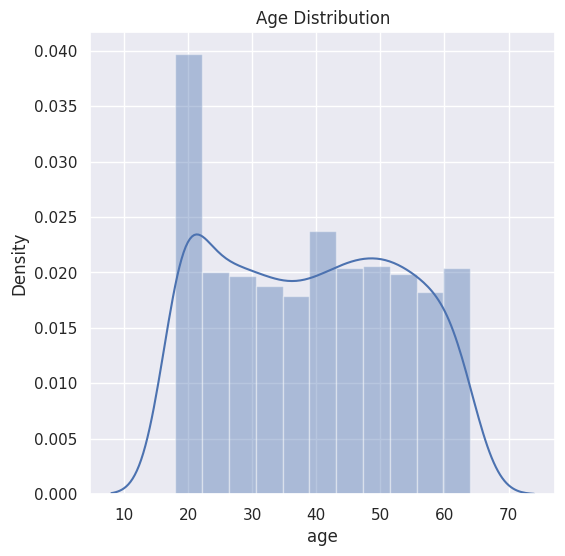

In [74]:
# The distrubition of age value
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show

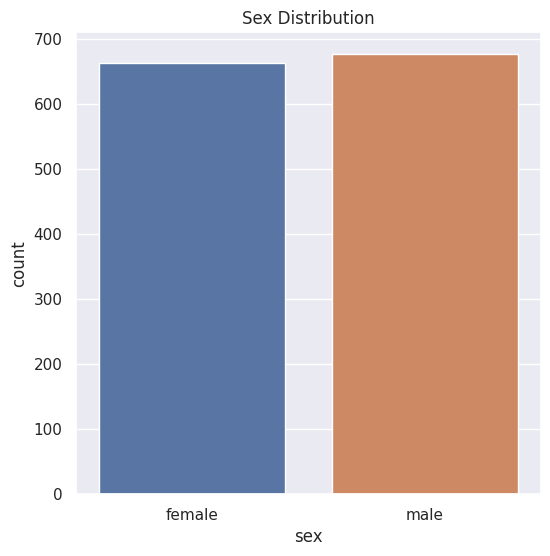

In [75]:
# Gender column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'sex', data = insurance_data)
plt.title("Sex Distribution")
plt.show()

In [76]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-77-dccd3683eca4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


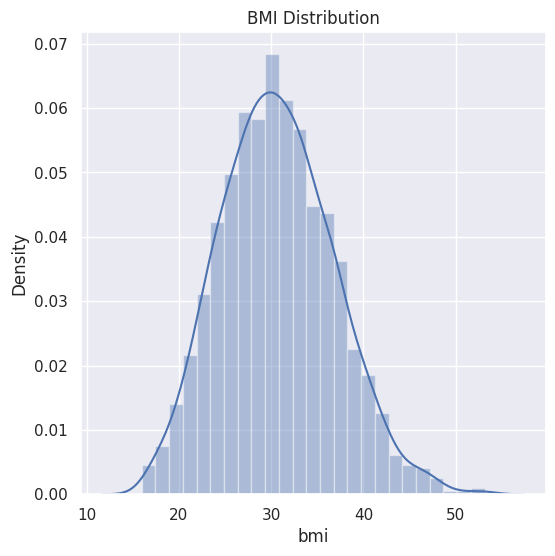

In [77]:
# BMI distribution of the dataset
plt.figure(figsize = (6, 6))
sns.distplot(insurance_data['bmi'])
plt.title("BMI Distribution")
plt.show()

Normal BMI Range --> 18.5 - 24.9


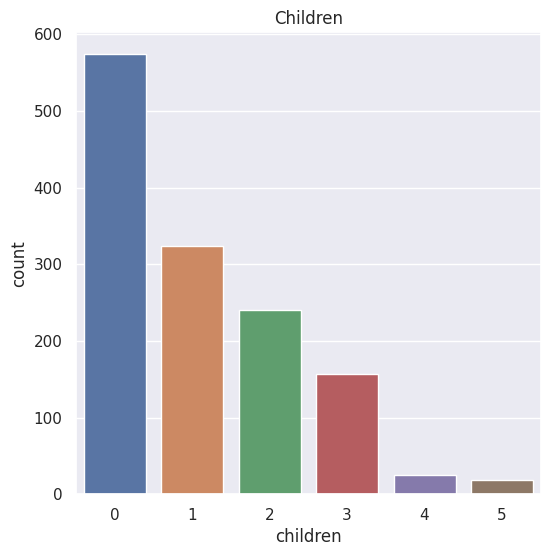

In [78]:
# Children column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'children', data = insurance_data)
plt.title("Children")
plt.show()

In [79]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

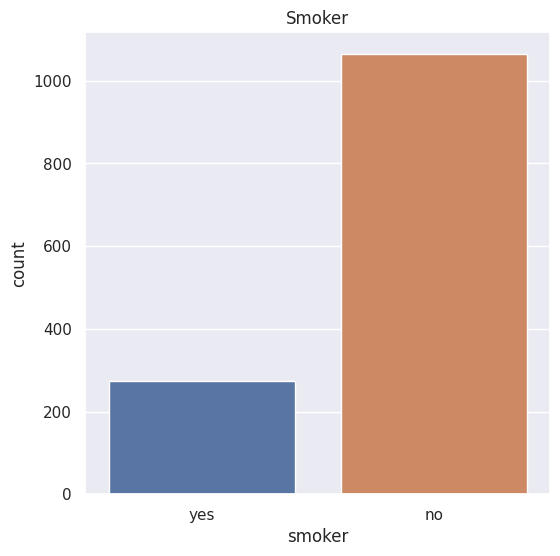

In [80]:
# Smoker column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'smoker', data = insurance_data)
plt.title("Smoker")
plt.show()

In [81]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

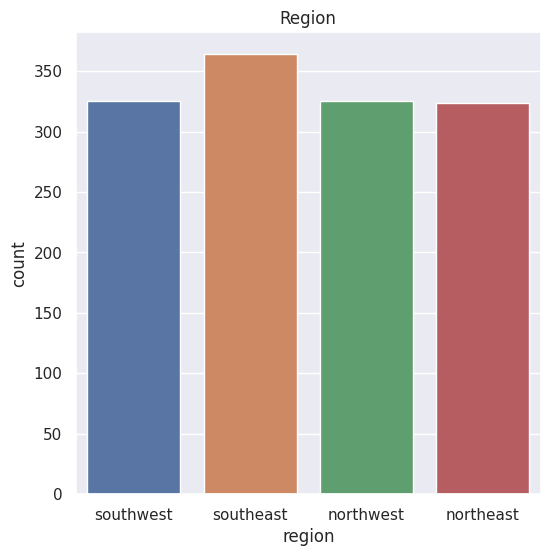

In [82]:
# Region column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'region', data = insurance_data)
plt.title("Region")
plt.show()

In [83]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-84-4f3176e76b56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


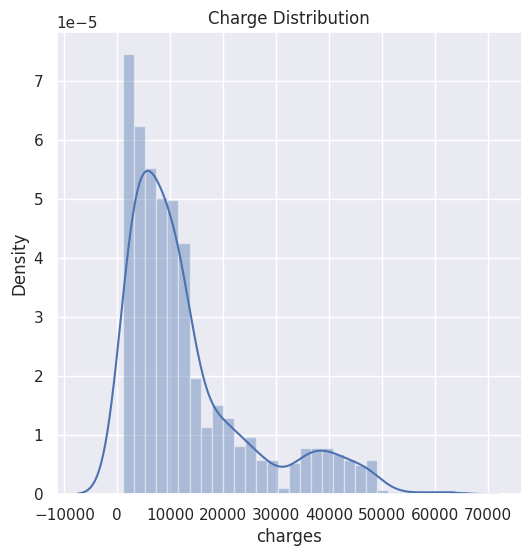

In [84]:
# Distribution of charges
plt.figure(figsize = (6, 6))
sns.distplot(insurance_data['charges'])
plt.title("Charge Distribution")
plt.show()

Data Pre-Processing

Encoding Categorical Features

In [85]:
from sqlalchemy.sql.expression import true
# Encoding sex column
insurance_data.replace({'sex':{'male':1, 'female':2}}, inplace = True)

# Encoding smoker column
insurance_data.replace({'smoker':{'yes':1, 'no':2}}, inplace = True)
# Encoding region column
insurance_data.replace({'region':{'southeast':1, 'southwest':2, 'northeast':3, 'northwest':4}}, inplace = True)

Splitting Features and Target

In [86]:
X = insurance_data.drop(columns = 'charges', axis = 1)
Y = insurance_data['charges']

In [87]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    2  27.900         0       1       2
1      18    1  33.770         1       2       1
2      28    1  33.000         3       2       1
3      33    1  22.705         0       2       4
4      32    1  28.880         0       2       4
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       2       4
1334   18    2  31.920         0       2       3
1335   18    2  36.850         0       2       1
1336   21    2  25.800         0       2       2
1337   61    2  29.070         0       1       4

[1338 rows x 6 columns]


In [88]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the Data into Train and Test Data

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [90]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [91]:
# Loading the linear regression model
regressor = LinearRegression()

In [92]:
# Training the model
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [93]:
# Prediction on training data
train_data_pred = regressor.predict(X_train)

In [94]:
# R squared value
r2_train = metrics.r2_score(Y_train, train_data_pred)
print('R squared value:', r2_train)

R squared value: 0.751505643411174


In [95]:
# Prediction on test data
test_data_pred = regressor.predict(X_test)

In [96]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_pred)
print('R squared value:', r2_test)

R squared value: 0.7447273869684077


Building Predictive System

In [105]:
input_data = (44,1,31.35,1,1,3)

# Changing input data to numpy array

input_data_as_np_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

[33789.97709494]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
